In [628]:
import sqlite3
import pandas as pd
import STAT5102_2023 as ct # common tools
import matplotlib.pyplot as plt
import seaborn as sns
import holidays



In [629]:
# Connect to the SQLite database
con = sqlite3.connect("Topic1_dataset.sqlite")

# Create a cursor to execute SQL commands
cur = con.cursor()

In [630]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
tables

[('sqlite_sequence',), ('products',), ('purchase',), ('sales',), ('shops',)]

## Preview tables


In [631]:
def get_pd_dataframe(query, connection):
    return pd.read_sql_query(query, connection)

products_preview = get_pd_dataframe("SELECT * FROM products ;", con)

purchase_preview = get_pd_dataframe("SELECT * FROM purchase ;", con)

shops_preview = get_pd_dataframe("SELECT * FROM shops;", con)

sales_preview = get_pd_dataframe("SELECT * FROM sales;", con)


In [632]:
products_preview.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product,2305,2305,000737108X,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,2305,2285,First Readers (HB): The Three Little Pigs,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2305.000000,NaN,NaN,NaN,73.779826,76.094323,0.000000,39.000000,49.000000,89.900000,1299.000000
book_original_price,2295,169,39.90,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
barcode,2194,2184,S9789811108372,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
barcode2,2305,2298,786943004793,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isbn,590,346,SPECIAL PRICE,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
purchase_preview.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
invoice,8650,1481,30004915,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,8650,1602,2764330898,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,8650.000000,NaN,NaN,NaN,154.052948,310.065890,1.000000,40.000000,72.000000,144.000000,6000.000000
trandate,8650,833,2018-03-21 00:00:00.000,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,8650.000000,NaN,NaN,NaN,47.676380,46.713965,0.000000,11.618000,31.400000,70.571500,1019.715000
discount,8650.000000,NaN,NaN,NaN,31.616474,34.753174,0.000000,0.000000,0.000000,70.000000,90.000000
disc_amt,8650.000000,NaN,NaN,NaN,475.103781,3443.278921,0.000000,0.000000,0.000000,0.000000,109491.798000
amount,8650.000000,NaN,NaN,NaN,2761.375047,6648.989256,0.000000,701.220000,1359.765000,2712.960000,114000.000000


In [634]:
shops_preview.describe(include='all').T

,count,unique,top,freq
location,25,25,01,1
shopname,22,22,OFFICE,1
isactive,25,2,Y,16
shopadd1,20,18,Active Minds Ltd.,3
shopadd2,18,17,Tel: (852) 2690-4766,2
shopadd3,17,16,"Tai Po, N.T.",2
shopadd4,11,11,"Tai Po, N.T.",1


In [635]:
sales_preview.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
channel,636257,5,Retail,382774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,636257,18,01,133392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice,636257,225129,40018126,3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clients,274138,6240,B7A379,7286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,636257,2227,9888155229,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,636257.000000,NaN,NaN,NaN,2.487276,18.710801,1.000000,1.000000,1.000000,2.000000,5000.000000
trandate,636257,4251,2021-03-31 00:00:00.000,4428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,636257.000000,NaN,NaN,NaN,75.936032,72.014439,0.000000,39.900000,59.000000,99.000000,1369.000000
discount,636257.000000,NaN,NaN,NaN,14.153772,19.253235,0.000000,0.000000,0.000000,35.000000,100.000000
disc_amt,636257.000000,NaN,NaN,NaN,4.971692,317.332983,0.000000,0.000000,0.000000,0.000000,192465.000000


no data missing for the data count

In [636]:
# Group by product and calculate total amount, total quantity, and average cost
avg_cost_by_product = (
    purchase_preview
    .groupby('product')
    .agg(total_amount=('amount', 'sum'),
         total_quantity=('quantity', 'sum'))
    .reset_index()
)

# Calculate average cost per product
avg_cost_by_product['avg_cost'] = avg_cost_by_product['total_amount'] / avg_cost_by_product['total_quantity']

# Display the result
print(avg_cost_by_product.head())

      product  total_amount  total_quantity  avg_cost
0  000737108X  11947.485400             526 22.713851
1  006445083X    117.514500              10 11.751450
2       01091   4592.250000              90 51.025000
3       01093   2296.125000              60 38.268750
4  0140563784 102082.636800            3356 30.417949


In [637]:

# Merge sales_preview with shop_table to get location info
merged_df = sales_preview.merge(shops_preview[['location', 'shopname']], on='location', how='left')
merged_df = merged_df.merge(products_preview[['product', 'title', 'price']].rename(columns={'price': 'market_price'}), on='product', how='left')
merged_df = merged_df.merge(avg_cost_by_product[['product', 'avg_cost']], on='product', how='left')


# Now merged_df contains location info from ship_table
merged_df


,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost
0,Retail,09,012245,None,1450810063,1,2014-01-01 00:00:00.000,198.000000,0.000000,0.000000,198.000000,Book Buddy -TKO,Piano Book Mini-Deluxe: Disney Princess Royal,209.000000,43.175000
1,Retail,09,012249,None,9782764320310,1,2014-01-01 00:00:00.000,75.000000,0.000000,0.000000,75.000000,Book Buddy -TKO,My First Puzzle Bk: Hello Kitty,85.000000,17.034500
2,Retail,09,012254,None,2764318715,1,2014-01-01 00:00:00.000,125.000000,0.000000,0.000000,125.000000,Book Buddy -TKO,My Busy Books: Disney Cars 2 - Cool Cars,135.000000,31.400000
3,Retail,09,012255,None,140523461X,1,2014-01-01 00:00:00.000,35.000000,0.000000,0.000000,35.000000,Book Buddy -TKO,My Thomas Story Library (R): #15 Bulstrode,39.900000,NaN
4,Retail,09,012265,None,1445426714,1,2014-01-01 00:00:00.000,99.900000,0.000000,0.000000,99.900000,Book Buddy -TKO,Disney Sing-Along: Princess with CD inside,99.900000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636252,Retail,04,267335,None,9781503710160,1,2025-09-11 00:00:00.000,329.000000,0.000000,0.000000,329.000000,BOOK BUDDY - WH,ME Reader Junior: Paw Patrol,329.000000,83.624249
636253,Retail,04,267338,9FF68B,9781488910104,1,2025-09-11 00:00:00.000,169.000000,0.000000,0.000000,169.000000,BOOK BUDDY - WH,Art Maker Complete Calligraphy Kit (Portrait w...,169.000000,40.464235
636254,Wholesale,01,40041077,B8A09E,9786267013823,2,2025-09-11 00:00:00.000,225.000000,35.000000,157.500000,292.500000,OFFICE,文字好好玩 (上冊),225.000000,80.128358
636255,Wholesale,01,40041077,B8A09E,9786267013830,2,2025-09-11 00:00:00.000,225.000000,35.000000,157.500000,292.500000,OFFICE,文字好好玩(下冊),225.000000,81.183358


In [638]:
# Group by channel and clients, calculate total revenue
client_revenue = merged_df.groupby(['channel', 'clients'])['amount'].sum().reset_index()

# Calculate percentage share within each channel
total_by_channel = client_revenue.groupby('channel')['amount'].transform('sum')
client_revenue['percentage'] = (client_revenue['amount'] / total_by_channel) * 100

# Sort by channel and revenue descending
client_revenue = client_revenue.sort_values(['channel', 'amount'], ascending=[True, False])

# Get top 5 clients per channel
top_clients = client_revenue.groupby('channel').head(5)

top_clients

,channel,clients,amount,percentage
53,Bookfair - Roadshow,Wondersaurus - Online Store,2242.490000,11.549820
22,Bookfair - Roadshow,6A24C5,1200.000000,6.180533
12,Bookfair - Roadshow,34CF92,1196.000000,6.159932
43,Bookfair - Roadshow,C0BAC2,949.000000,4.887772
19,Bookfair - Roadshow,625202,791.100000,4.074517
97,Bookfair - School,FB2452,228956.120000,19.379552
89,Bookfair - School,BC6B96,202981.400000,17.180971
71,Bookfair - School,68ED0B,166961.750000,14.132157
56,Bookfair - School,03BEBD,139447.650000,11.803279
78,Bookfair - School,93AB8C,129544.380000,10.965036


In [639]:
# Change channel to 'Bookfair - Roadshow' if client name is 'Hong Kong Book Fair'
merged_df.loc[merged_df['clients'] == 'Hong Kong Book Fair', 'channel'] = 'Bookfair - Roadshow'

# Verify the update
print(merged_df[merged_df['clients'] == 'Hong Kong Book Fair'][['clients', 'channel']].head())

                   clients              channel
47833  Hong Kong Book Fair  Bookfair - Roadshow
47834  Hong Kong Book Fair  Bookfair - Roadshow
47835  Hong Kong Book Fair  Bookfair - Roadshow
47836  Hong Kong Book Fair  Bookfair - Roadshow
47837  Hong Kong Book Fair  Bookfair - Roadshow


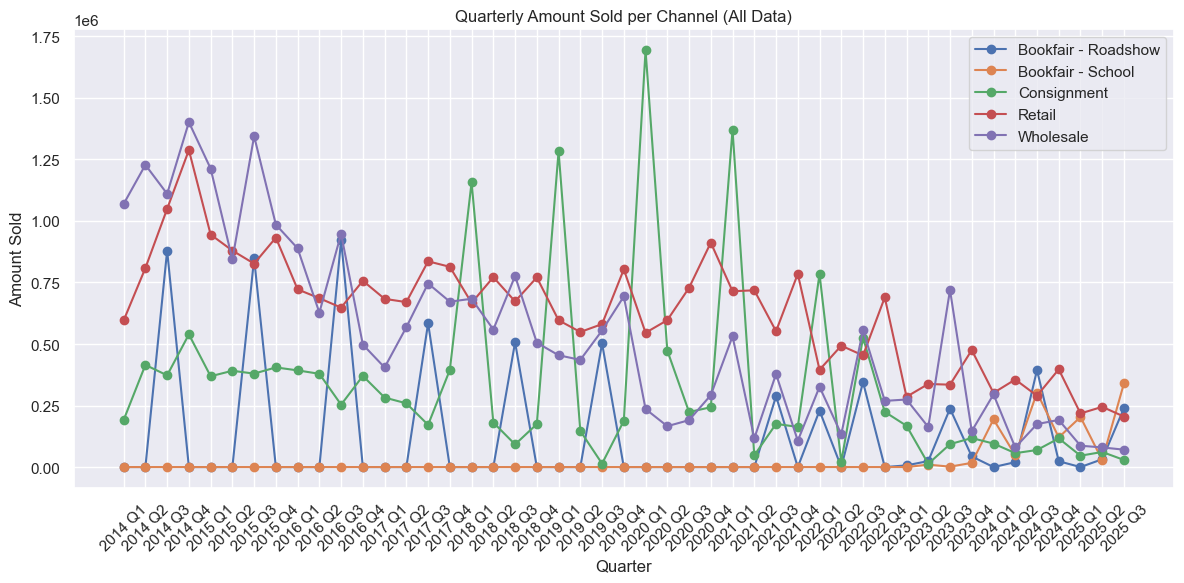

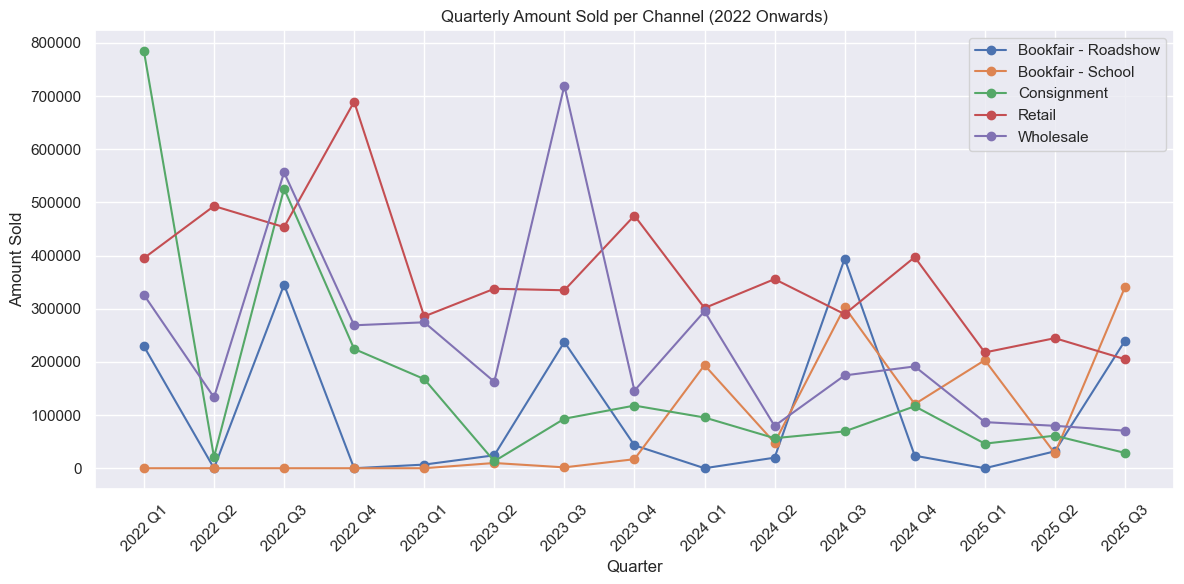

In [640]:
# Convert trandate to datetime
merged_df['trandate'] = pd.to_datetime(merged_df['trandate'])

# Create quarter label in format "QX YYYY"
merged_df['quarter_label'] = merged_df['trandate'].dt.to_period('Q').apply(lambda q: f"{q.year} Q{q.quarter}")

def plot_quarterly(df, title, channel=None):
    # If a specific channel is selected, filter the dataframe
    if channel:
        df = df[df['channel'] == channel]

    # Group by channel and quarter, summing amount
    quarterly_grouped = df.groupby(['channel', 'quarter_label'])['amount'].sum().reset_index()

    # Pivot for plotting
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='channel', values='amount').fillna(0)
    pivot_df.index = pivot_df.index.astype(str)  # Ensure readable labels

    # Plot
    plt.figure(figsize=(12, 6))
    for ch in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[ch], marker='o', label=ch)

    plt.title(title)
    plt.xlabel('Quarter')
    plt.ylabel('Amount Sold')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Chart 1: All data
plot_quarterly(merged_df, 'Quarterly Amount Sold per Channel (All Data)')

# Chart 2: Data from 2022 onwards
filtered_df = merged_df[merged_df['trandate'].dt.year >= 2022]
plot_quarterly(filtered_df, 'Quarterly Amount Sold per Channel (2022 Onwards)')

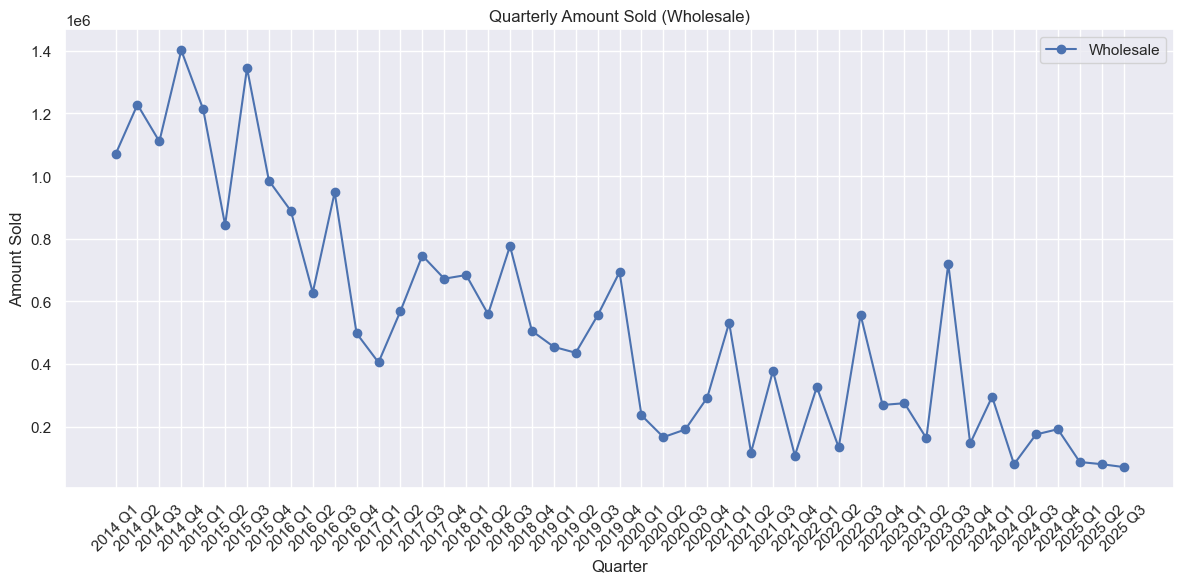

In [641]:
plot_quarterly(merged_df, 'Quarterly Amount Sold (Wholesale)','Wholesale')


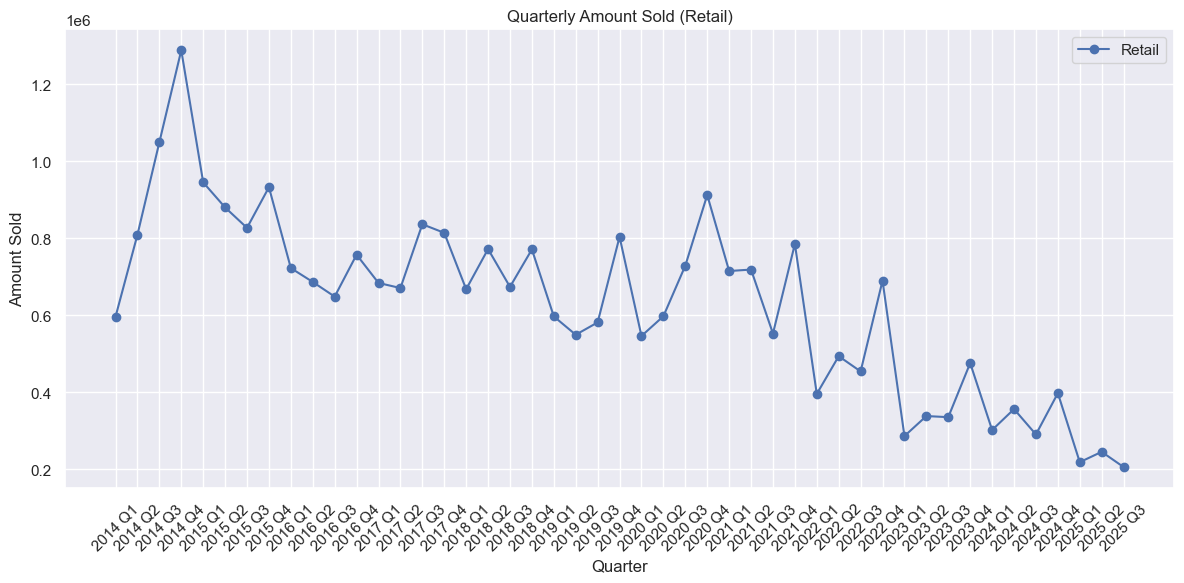

In [642]:
plot_quarterly(merged_df, 'Quarterly Amount Sold (Retail)','Retail')


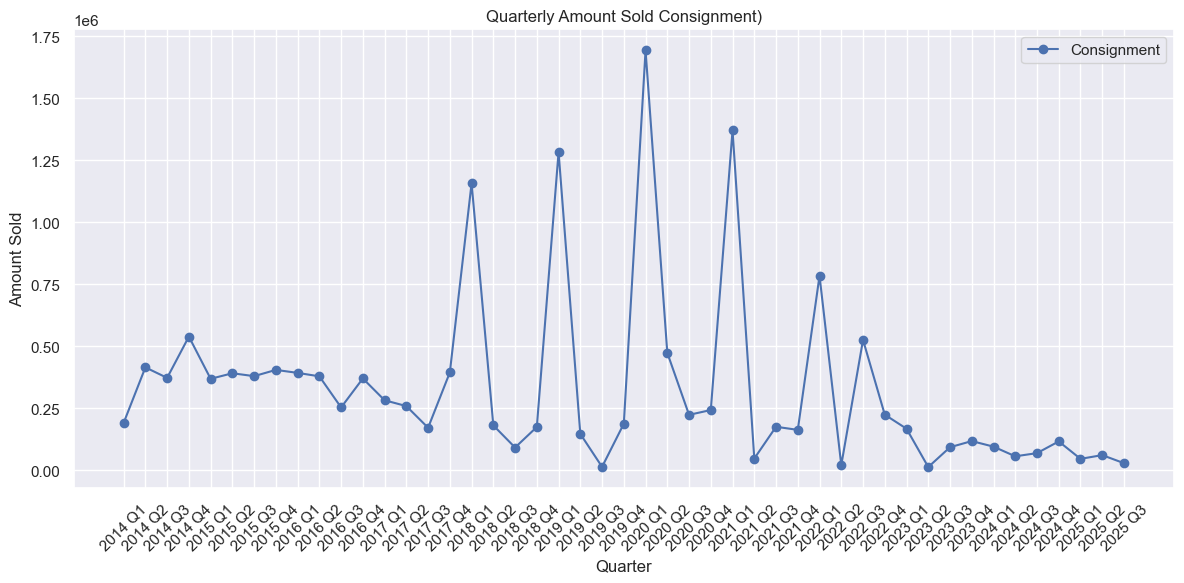

In [643]:
plot_quarterly(merged_df, 'Quarterly Amount Sold Consignment)','Consignment')

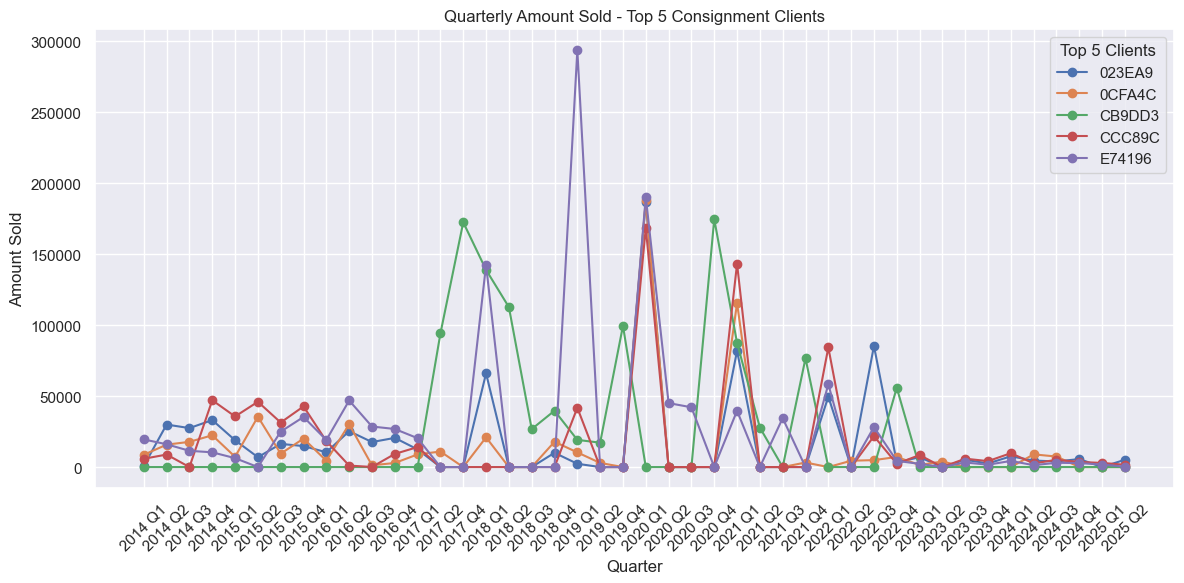

In [644]:
# Group by channel and clients, calculate total revenue
consign_merged_df=merged_df[merged_df['channel'] == 'Consignment']

def plot_top5_clients_quarterly(df, title):
    # Group by clients and quarter
    quarterly_grouped = df.groupby(['clients', 'quarter_label'])['amount'].sum().reset_index()

    # Compute total per client
    total_per_client = quarterly_grouped.groupby('clients')['amount'].sum().sort_values(ascending=False)

    # Get top 5 clients
    top5_clients = total_per_client.head(5).index

    # Filter for top 5
    quarterly_grouped = quarterly_grouped[quarterly_grouped['clients'].isin(top5_clients)]

    # Pivot for plotting
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='clients', values='amount').fillna(0)
    pivot_df = pivot_df.sort_index()  # Ensure quarters are in order

    # Plot
    plt.figure(figsize=(12, 6))
    for client in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[client], marker='o', label=client)

    plt.title(title)
    plt.xlabel('Quarter')
    plt.ylabel('Amount Sold')
    plt.xticks(rotation=45)
    plt.legend(title='Top 5 Clients')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage
plot_top5_clients_quarterly(consign_merged_df, 'Quarterly Amount Sold - Top 5 Consignment Clients')




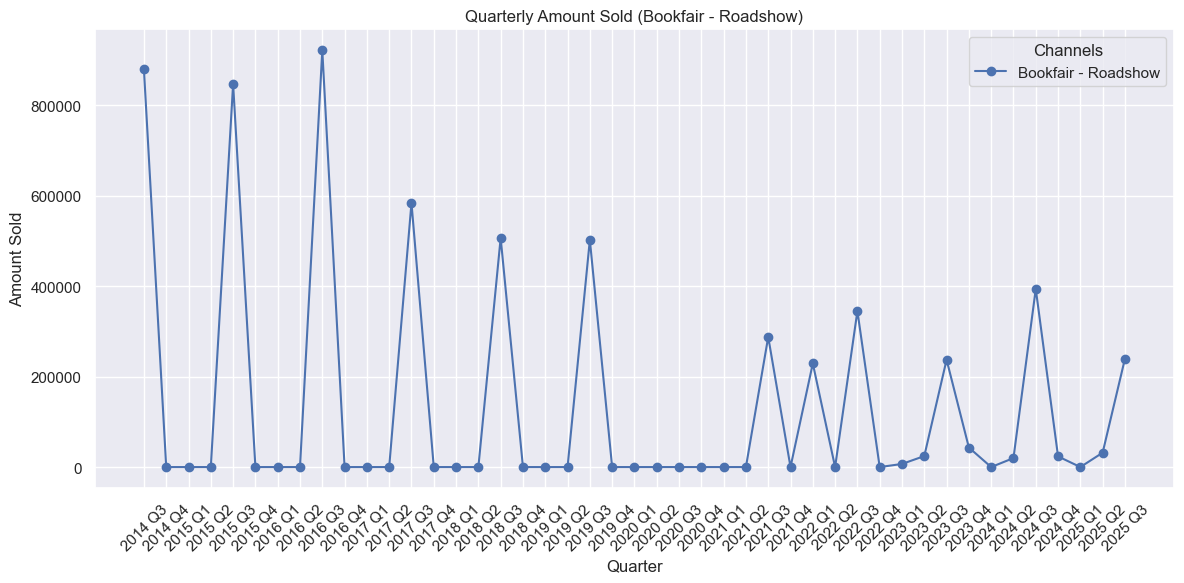

In [645]:
def plot_quarterly_with_highlight(df, title):
    # Group by channel and quarter, summing amount
    quarterly_grouped = df.groupby(['channel', 'quarter_label'])['amount'].sum().reset_index()

    # Get full quarter range from min to max
    min_quarter = pd.Period(quarterly_grouped['quarter_label'].min().replace(" ", ""), freq='Q')
    max_quarter = pd.Period(quarterly_grouped['quarter_label'].max().replace(" ", ""), freq='Q')
    all_quarters = pd.period_range(start=min_quarter, end=max_quarter, freq='Q')
    all_quarters_labels = [f"{q.year} Q{q.quarter}" for q in all_quarters]

    # Pivot for plotting
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='channel', values='amount')

    # Reindex to include all quarters, fill missing with 0
    pivot_df = pivot_df.reindex(all_quarters_labels, fill_value=0)

    # Sort index to ensure chronological order
    pivot_df = pivot_df.sort_index()

    # Plot
    plt.figure(figsize=(12, 6))
    for channel in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[channel], marker='o', label=channel)


    plt.title(title)
    plt.xlabel('Quarter')
    plt.ylabel('Amount Sold')
    plt.xticks(rotation=45)
    plt.legend(title='Channels')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_df = merged_df[merged_df['channel'] == 'Bookfair - Roadshow']
plot_quarterly_with_highlight(filtered_df, 'Quarterly Amount Sold (Bookfair - Roadshow)')


In [646]:
merged_df

,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label
0,Retail,09,012245,None,1450810063,1,2014-01-01,198.000000,0.000000,0.000000,198.000000,Book Buddy -TKO,Piano Book Mini-Deluxe: Disney Princess Royal,209.000000,43.175000,2014 Q1
1,Retail,09,012249,None,9782764320310,1,2014-01-01,75.000000,0.000000,0.000000,75.000000,Book Buddy -TKO,My First Puzzle Bk: Hello Kitty,85.000000,17.034500,2014 Q1
2,Retail,09,012254,None,2764318715,1,2014-01-01,125.000000,0.000000,0.000000,125.000000,Book Buddy -TKO,My Busy Books: Disney Cars 2 - Cool Cars,135.000000,31.400000,2014 Q1
3,Retail,09,012255,None,140523461X,1,2014-01-01,35.000000,0.000000,0.000000,35.000000,Book Buddy -TKO,My Thomas Story Library (R): #15 Bulstrode,39.900000,NaN,2014 Q1
4,Retail,09,012265,None,1445426714,1,2014-01-01,99.900000,0.000000,0.000000,99.900000,Book Buddy -TKO,Disney Sing-Along: Princess with CD inside,99.900000,NaN,2014 Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636252,Retail,04,267335,None,9781503710160,1,2025-09-11,329.000000,0.000000,0.000000,329.000000,BOOK BUDDY - WH,ME Reader Junior: Paw Patrol,329.000000,83.624249,2025 Q3
636253,Retail,04,267338,9FF68B,9781488910104,1,2025-09-11,169.000000,0.000000,0.000000,169.000000,BOOK BUDDY - WH,Art Maker Complete Calligraphy Kit (Portrait w...,169.000000,40.464235,2025 Q3
636254,Wholesale,01,40041077,B8A09E,9786267013823,2,2025-09-11,225.000000,35.000000,157.500000,292.500000,OFFICE,文字好好玩 (上冊),225.000000,80.128358,2025 Q3
636255,Wholesale,01,40041077,B8A09E,9786267013830,2,2025-09-11,225.000000,35.000000,157.500000,292.500000,OFFICE,文字好好玩(下冊),225.000000,81.183358,2025 Q3


In [647]:
import pandas as pd

# Assuming your DataFrame is named merged_df
# Group by both 'product' and 'title', sum the 'amount' column
top_revenue = (
    merged_df.groupby(['product', 'title'])['amount']
    .sum()
    .reset_index()
    .sort_values(by='amount', ascending=False)
)

# Get top 10
top_10 = top_revenue.head(10)

print("Top 10 products by total revenue:")
top_10

Top 10 products by total revenue:


,product,title,amount
1277,9781409570202,Usborne My First Reading Library Set (50 Books...,966599.160000
1288,9781409591528,Usborne My Second Reading Library Set (50 Book...,556393.120000
341,140525548X,Mr. Men The Complete Collection - 50 Copies,475967.350000
1335,9781450850018,My First Smart Pad: Eric Carle,467484.300000
2219,9888155229,Ladder Treasury for Girls (10 Stories),436821.380000
2217,9888155202,Ladder Collection: Thomas & Friends (10 Stories),383015.440000
2218,9888155210,Ladder Collection: Disney Pixar Cars (10 Stories),338215.190000
1452,9781474915083,The Usborne Reading Collection (40 Books - Yel...,336732.650000
2170,9789888155897,Ladder Collection: Disney Classics - Best Stor...,318026.300000
1574,9781503700383,ME Reader: Disney Frozen,311393.710000


In [648]:
import pandas as pd

# Assuming your DataFrame is named merged_df
# Group by both 'product' and 'title', sum the 'amount' column
top_sell = (
    merged_df.groupby(['product', 'title'])['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
)

# Get top 10
top_10 = top_sell.head(10)

print("Top 10 products by total unit sold:")
top_10

Top 10 products by total unit sold:


,product,title,quantity
2217,9888155202,Ladder Collection: Thomas & Friends (10 Stories),17106
2218,9888155210,Ladder Collection: Disney Pixar Cars (10 Stories),9678
2219,9888155229,Ladder Treasury for Girls (10 Stories),8272
2176,9789888155972,Disney Frozen Story Collection (10 Stories),6996
2186,9789888367078,Ladder Collection: Thomas & Friends #3 (10 Sto...,6032
2185,9789888367061,Ladder Collection: Thomas & Friends #2 (10 Sto...,6022
2170,9789888155897,Ladder Collection: Disney Classics - Best Stor...,5985
2212,9888138804,Ladder Collection for Girls (10 Stories),5016
2125,9789888155446,Ladder Collection: Barbie (10 Stories),4958
2178,9789888155996,Disney Padded Board Book: Disney Princess - ABC,4911


In [649]:
merged_df['final_price']= merged_df['amount'] / merged_df['quantity']

In [650]:
def plot_quarterly(df, title=None, channel=None, product=None):
    # Validate required columns
    required_cols = {'channel', 'product', 'quarter_label', 'amount'}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_cols}")

    # Filter by channel and product
    if channel:
        df = df[df['channel'] == channel]
    if product:
        df = df[df['product'] == product]

    if df.empty:
        raise ValueError("No data available for the given filters.")

    # Group and pivot
    quarterly_grouped = df.groupby(['channel', 'quarter_label'])['amount'].sum().reset_index()
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='channel', values='amount').fillna(0)

    # Sort quarters if possible
    pivot_df = pivot_df.sort_index()

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    for ch in pivot_df.columns:
        ax.plot(pivot_df.index, pivot_df[ch], marker='o', label=ch)


    book_title = df['title'].iloc[0] if 'title' in df.columns else ''

    # Title
    if not title:
        title = f"Price Over Time for {product} - {book_title}"
        if channel:
            title += f" - {channel}"

    ax.set_title(title)
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Amount Sold')
    ax.set_xticks(range(len(pivot_df.index)))
    ax.set_xticklabels(pivot_df.index, rotation=45)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()


In [651]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_price_over_time(df, title=None, product=None, channel=None):
    # Validate columns
    required_cols = {'trandate', 'final_price', 'channel','market_price','avg_cost'}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_cols}")

    # Convert trandate to datetime
    df['trandate'] = pd.to_datetime(df['trandate'])

    # Apply filters
    if product:
        df = df[df['product'] == product]
    if channel:
        df = df[df['channel'] == channel]

    if df.empty:
        raise ValueError("No data available for the given filters.")

    # Sort by date
    df = df.sort_values('trandate')

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    for ch in df['channel'].unique():
        subset = df[df['channel'] == ch]
        ax.scatter(subset['trandate'], subset['final_price'], label=ch, alpha=0.6, s=20)

    # ✅ Add dotted lines for avg_cost and market_price if columns exist
    if 'avg_cost' in df.columns:
        ax.plot(df['trandate'], df['avg_cost'], linestyle=':', color='green', label='Avg Cost')
    if 'market_price' in df.columns:
        ax.plot(df['trandate'], df['market_price'], linestyle='--', color='red', label='Market Price')

    # Format date axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    book_title = df['title'].iloc[0] if 'title' in df.columns else ''
    ax.set_title(title or f"Price Over Time for {product} - {book_title}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

Overview for the most unit sold book, 9888155202, Ladder Collection: Thomas & Friends (10 Stories)

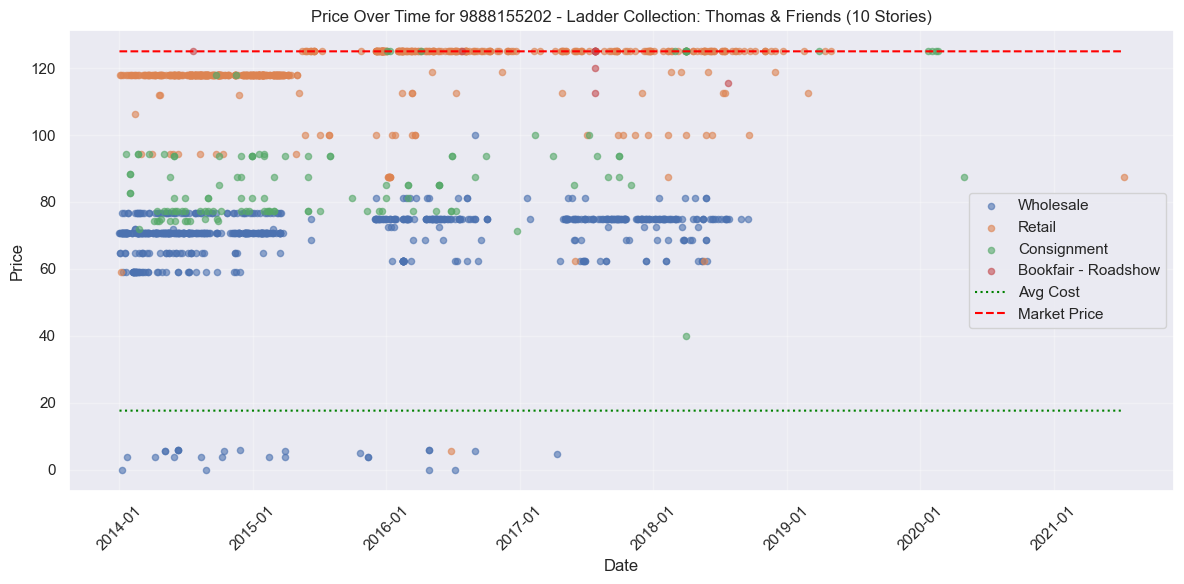

In [652]:
plot_price_over_time(merged_df, product='9888155202')

In [653]:
top1_sale_record = merged_df[merged_df['product'] == '9888155202']
top1_sale_record[top1_sale_record['channel'] == 'Wholesale'][top1_sale_record['final_price'] < top1_sale_record['avg_cost'] ]

,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label,final_price
1924,Wholesale,01,30040755,3F9A36,9888155202,1,2014-01-09,0.000000,0.000000,0.000000,0.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q1,0.000000
4894,Wholesale,01,30041095,44094C,9888155202,200,2014-01-21,3.700000,0.000000,0.000000,740.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q1,3.700000
20161,Wholesale,01,30043305,44094C,9888155202,400,2014-04-09,3.700000,0.000000,0.000000,1480.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,3.700000
26812,Wholesale,01,30043958,95E4BE,9888155202,600,2014-05-05,15.990000,65.000000,0.000000,3357.900000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,5.596500
26836,Wholesale,01,30043959,95E4BE,9888155202,20,2014-05-05,15.990000,65.000000,0.000000,111.930000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,5.596500
32652,Wholesale,01,30044808,44094C,9888155202,200,2014-05-30,3.700000,0.000000,0.000000,740.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,3.700000
36178,Wholesale,01,30044992,1A4CBD,9888155202,10,2014-06-09,6.000000,0.000000,0.000000,60.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,6.000000
36182,Wholesale,01,30044992,1A4CBD,9888155202,20,2014-06-09,6.000000,0.000000,0.000000,120.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,6.000000
36183,Wholesale,01,30044992,1A4CBD,9888155202,20,2014-06-09,6.000000,0.000000,0.000000,120.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q2,6.000000
53413,Wholesale,01,30046480,44094C,9888155202,160,2014-08-12,3.700000,0.000000,0.000000,592.000000,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.000000,17.657177,2014 Q3,3.700000


some of the transition with final price below average cost for wholesale channel, why?

In [654]:
top_products_preview = products_preview[products_preview['product'] == '9888155202']
top_products_preview

,product,title,price,book_original_price,barcode,barcode2,isbn
2295,9888155202,Ladder Collection: Thomas & Friends (10 Stories),125.000000,118.00,None,9789888155200,None


how to identify the discount rate?


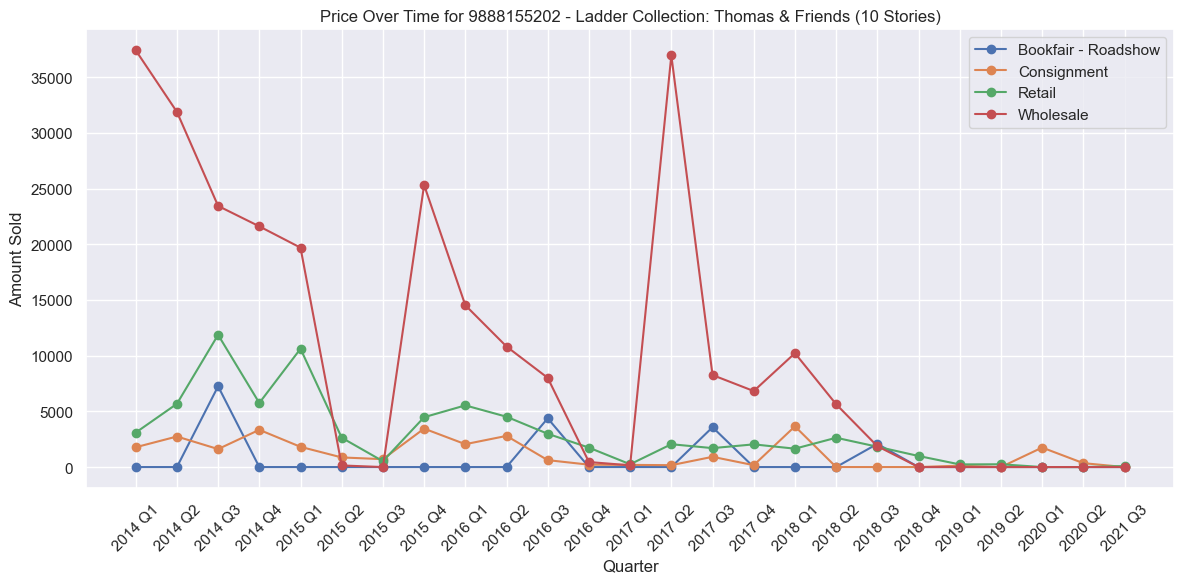

In [655]:
plot_quarterly(merged_df, product='9888155202')

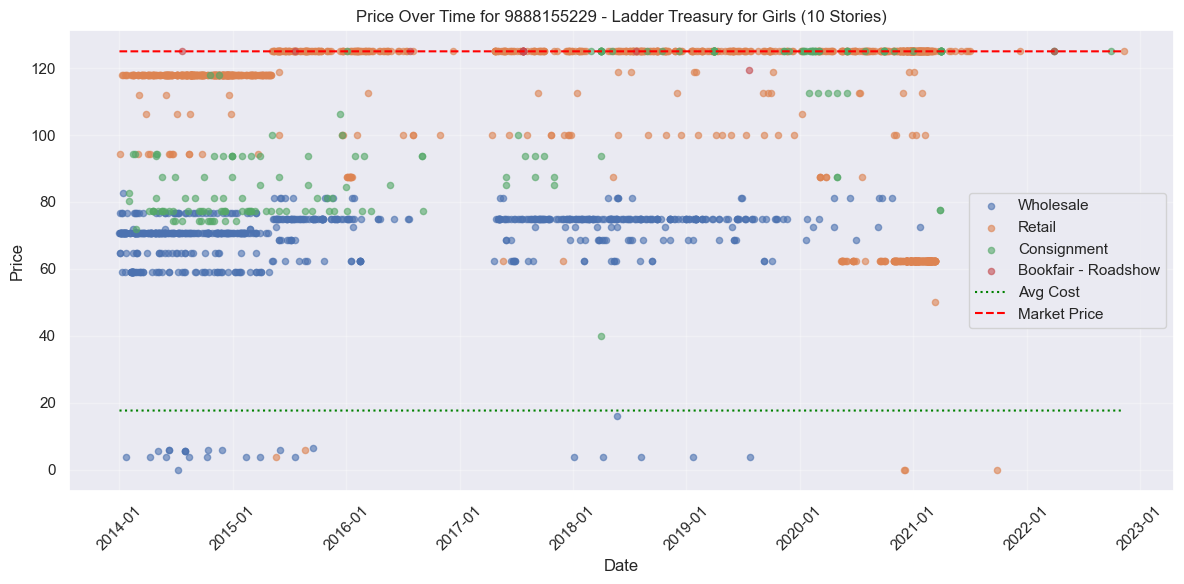

In [656]:
plot_price_over_time(merged_df, product='9888155229')


In [657]:
top1_sale_record = merged_df[merged_df['product'] == '9888155229']
top1_sale_record[top1_sale_record['channel'] == 'Wholesale'][top1_sale_record['final_price'] < top1_sale_record['avg_cost'] ]

,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label,final_price
4895,Wholesale,01,30041095,44094C,9888155229,220,2014-01-21,3.700000,0.000000,0.000000,814.000000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q1,3.700000
20163,Wholesale,01,30043305,44094C,9888155229,400,2014-04-09,3.700000,0.000000,0.000000,1480.000000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q2,3.700000
26835,Wholesale,01,30043959,95E4BE,9888155229,5,2014-05-05,15.990000,65.000000,0.000000,27.990000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q2,5.598000
32655,Wholesale,01,30044808,44094C,9888155229,300,2014-05-30,3.700000,0.000000,0.000000,1110.000000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q2,3.700000
36185,Wholesale,01,30044992,1A4CBD,9888155229,20,2014-06-09,6.000000,0.000000,0.000000,120.000000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q2,6.000000
36186,Wholesale,01,30044992,1A4CBD,9888155229,20,2014-06-09,6.000000,0.000000,0.000000,120.000000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q2,6.000000
44907,Wholesale,01,30045548,454669,9888155229,1,2014-07-08,0.000000,0.000000,0.000000,0.000000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q3,0.000000
50281,Wholesale,01,30045949,95E4BE,9888155229,24,2014-07-30,15.990000,65.000000,0.000000,134.320000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q3,5.596667
50284,Wholesale,01,30045949,95E4BE,9888155229,38,2014-07-30,15.990000,65.000000,0.000000,212.670000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q3,5.596579
50285,Wholesale,01,30045949,95E4BE,9888155229,38,2014-07-30,15.990000,65.000000,0.000000,212.670000,OFFICE,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q3,5.596579


In [658]:
top1_sale_record = merged_df[merged_df['product'] == '9888155229']
top1_sale_record[top1_sale_record['channel'] == 'Retail']

,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label,final_price
296,Retail,08,086844,D09C8E,9888155229,1,2014-01-03,118.000000,20.000000,0.000000,94.400000,BOOK CASTLE-LG2,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q1,94.400000
1357,Retail,08,087155,None,9888155229,1,2014-01-08,118.000000,0.000000,0.000000,118.000000,BOOK CASTLE-LG2,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q1,118.000000
2332,Retail,07,106647,None,9888155229,1,2014-01-11,118.000000,0.000000,0.000000,118.000000,ASMK,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q1,118.000000
4052,Retail,09,012970,None,9888155229,1,2014-01-18,118.000000,0.000000,0.000000,118.000000,Book Buddy -TKO,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q1,118.000000
5112,Retail,09,013197,None,9888155229,1,2014-01-22,118.000000,0.000000,0.000000,118.000000,Book Buddy -TKO,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2014 Q1,118.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509872,Retail,08,244795,None,9888155229,1,2021-06-27,125.000000,0.000000,0.000000,125.000000,BOOK CASTLE-LG2,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2021 Q2,125.000000
510358,Retail,04,206835,None,9888155229,1,2021-07-02,125.000000,0.000000,0.000000,125.000000,BOOK BUDDY - WH,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2021 Q3,125.000000
519961,Retail,03,361463,None,9888155229,1,2021-09-29,125.000000,100.000000,0.000000,0.000000,BOOK CASTLE-OT,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2021 Q3,0.000000
529113,Retail,11,176916,None,9888155229,1,2021-12-11,125.000000,0.000000,0.000000,125.000000,WDSS,Ladder Treasury for Girls (10 Stories),125.000000,17.686567,2021 Q4,125.000000


In [659]:
top_products_preview = products_preview[products_preview['product'] == '9888155229']
top_products_preview

,product,title,price,book_original_price,barcode,barcode2,isbn
2297,9888155229,Ladder Treasury for Girls (10 Stories),125.000000,118.00,None,9789888155224,None


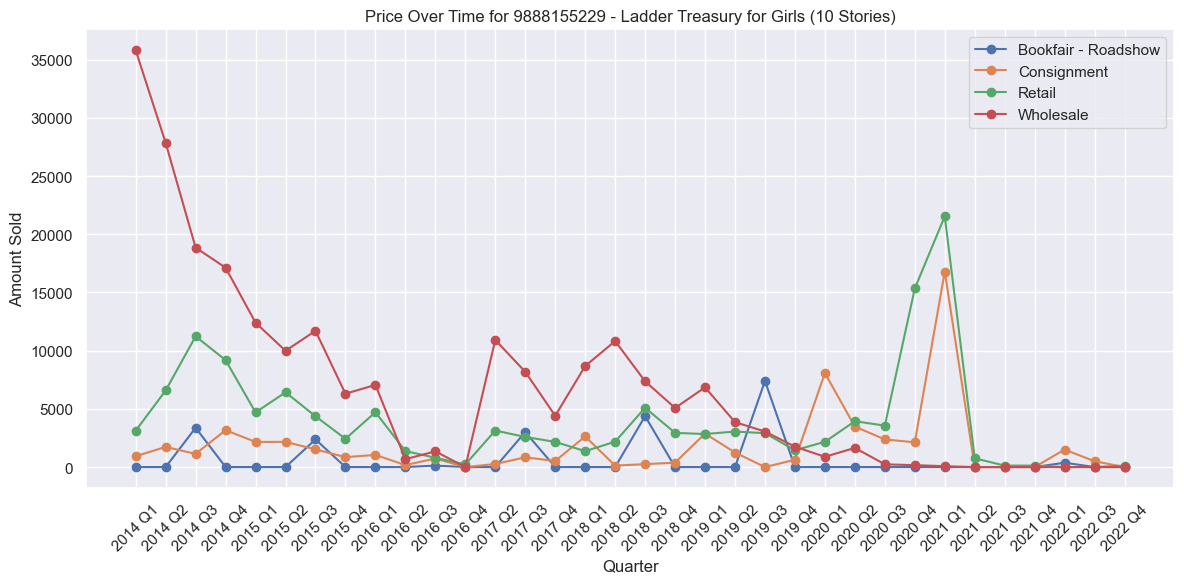

In [660]:
plot_quarterly(merged_df, product='9888155229')

In [661]:
dog_man_records = products_preview[products_preview['title'].str.contains('Dog Man', case=False, na=False)]
dog_man_records

,product,title,price,book_original_price,barcode,barcode2,isbn
1122,9780545581608,Dog Man HB (OP),99.900000,99.90,9780545581608,9780545581608,FINAL SALE
1132,9780545935173,Dog Man #05 HB: Lord of the Fleas (OP),99.900000,99.90,0545935172,9780545935173,FINAL SALE
1133,9780545935180,Dog Man #04 HB: Dog Man And Cat Kid (OP),99.900000,99.90,0545935180,9780545935180,FINAL SALE
1134,9780545935203,Dog Man #02 HB: Unleashed (OP),99.900000,99.90,9780545935203,9780545935203,FINAL SALE
1135,9780545935210,Dog Man #03 HB: A Tale of Two Kitties (OP),99.900000,99.90,0545935210,9780545935210,FINAL SALE
1249,9781338230642,UK-Dog Man The Epic 3 Books Collection By Dav ...,279.000000,279,9781338230642,9781338230642,None
1250,9781338236576,Dog Man #06 HB: Brawl Of the Wild (OP),99.900000,79.00,1338236571,9781338236576,FINAL SALE
1251,9781338236590,Dog Man #07 HB: For Whom The Ball Rolls,129.900000,$129.90,1338236598,9781338236590,SPECIAL PRICE
1259,9781338323214,Dog Man #8 HB: Fetch-22,129.900000,129.90,1338323210,9781338323214,SPECIAL PRICE
1263,9781338535624,Dog Man #9 HB: Grime and Punishment,129.900000,129.90,1338535625,9781338535624,SPECIAL PRICE


In [662]:
dog_man_records03 = products_preview[
    products_preview['title'].str.contains('Dog Man', case=False, na=False) &
    products_preview['title'].str.contains('#03', case=False, na=False)
]
dog_man_records03

,product,title,price,book_original_price,barcode,barcode2,isbn
1135,9780545935210,Dog Man #03 HB: A Tale of Two Kitties (OP),99.900000,99.90,0545935210,9780545935210,FINAL SALE
1271,9781338741056,Dog Man #03 HB: Tale of Two Kitties,129.900000,None,9781338741056,9781338741056,None
2135,9789811157493,Dog Man (PB) #03: A Tale of Two Kitties,79.900000,69.90,9811157499,9789811157493,None


In [663]:
cat_man_records = products_preview[products_preview['title'].str.contains('Cat Kid Comic Club', case=False, na=False)]
cat_man_records

,product,title,price,book_original_price,barcode,barcode2,isbn
1268,9781338712766,Cat Kid Comic Club #1,129.900000,129.90,1338712764,9781338712766,FIXED PRICE
1275,9781338784855,Cat Kid Comic Club #2: Perspectives HB,129.900000,129.90,1338784854,9781338784855,None
1278,9781338801941,Cat Kid Comic Club #3: On Purpose HB,129.900000,99.00,1338801945,9781338801941,None
1280,9781338846621,Cat Kid Comic Club #4: Collaborations HB,129.900000,99.00,1338846620,9781338846621,None
2138,9789813378124,Dav Pilkey - Cat Kid Comic Club #2: Perspectives,89.900000,89.90,9789813378124,9789813378124,9789813378124
2139,9789813387171,Dav Pilkey - Cat Kid Comic Club #4 Collaborations,89.900000,89.90,9789813387171,9789813387171,None
2141,9789813387386,Dav Pilkey - Cat Kid Comic Club #3: On Purpose,89.900000,89.90,9789813387386,9789813387386,9789813387386
2162,9789814958004,Dav Pilkey - Cat Kid Comic Club #1,89.900000,89.90,981495800X,978981495800,None


In [664]:
GWrecords = products_preview[products_preview['title'].str.contains('Guinness World', case=False, na=False)]
GWrecords

,product,title,price,book_original_price,barcode,barcode2,isbn
66,0439715652,Guinness World Records: Fearless Feats,49.900000,49.90,9780439715652,9780439715652,None
67,0439745845,Guinness World Records: Top 10 Awesome Ocean R...,39.900000,39.50,9780439745840,9780439745840,None
68,0439745853,Guinness World Records: Wildlives,49.900000,49.90,9780439745857,9780439745857,None
70,0439810574,Guinness World Records: Incredible Collection,79.900000,79.90,9780439810579,9780439810579,None
73,043986562X,Guinness World Records : To The Extreme,149.900000,149.90,9780439865623,9780439865623,None
238,0843111526,Mad Libs : Guinness World Records,39.900000,39.90,None,0843111526,None
244,0843113855,Guinness World Records: Brain Stretching Quiz Pad,59.900000,$59.90,9780843113853,9780843113853,None
245,0843113898,Guinness World Records: Mind Boggling Quiz Pad,59.900000,$59.90,9780843113891,9780843113891,None
836,184510403X,Guinness World Records: Can You Find It?,59.900000,75.00,9781845104030,9781845104030,None
837,1845104048,Guinness World Records: One Minute Challenges,59.900000,75.00,9781845104047,9781845104047,None


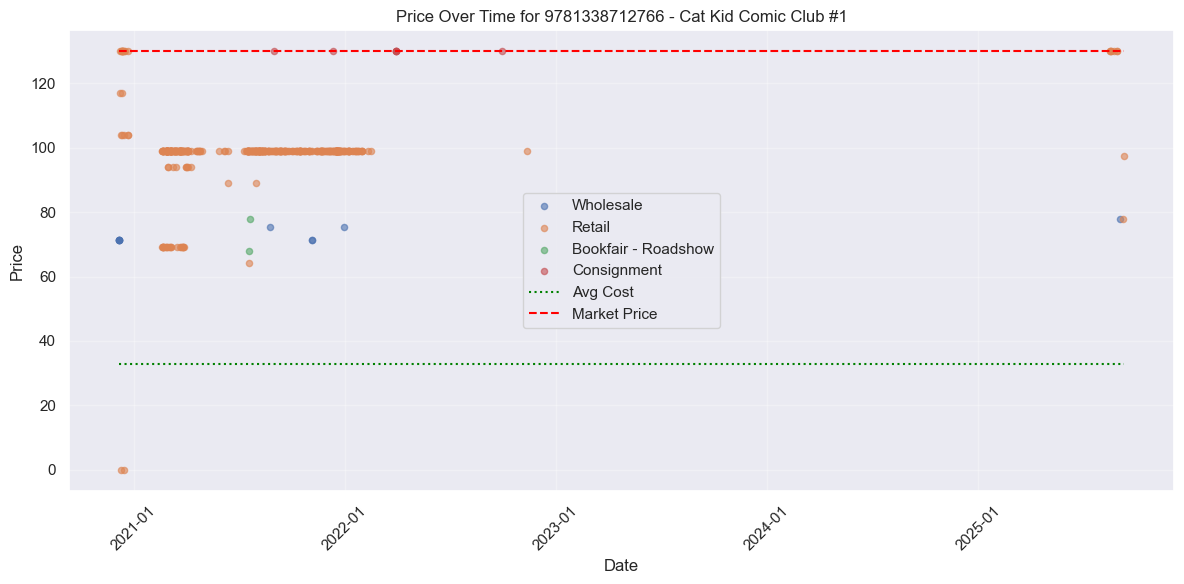

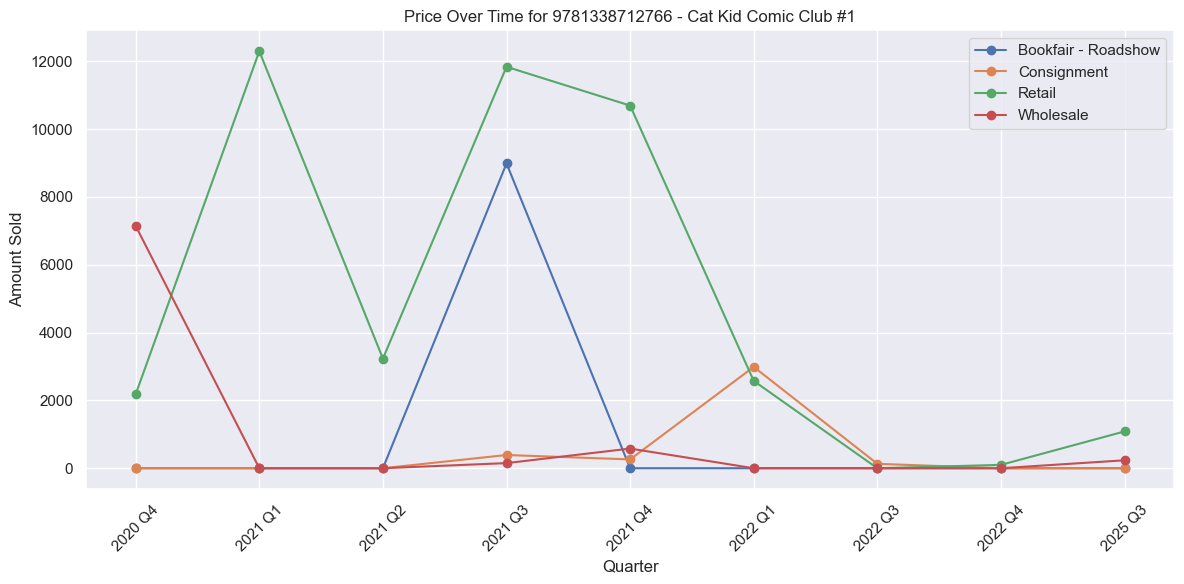

In [665]:
plot_price_over_time(merged_df, product='9781338712766')
plot_quarterly(merged_df, product='9781338712766')



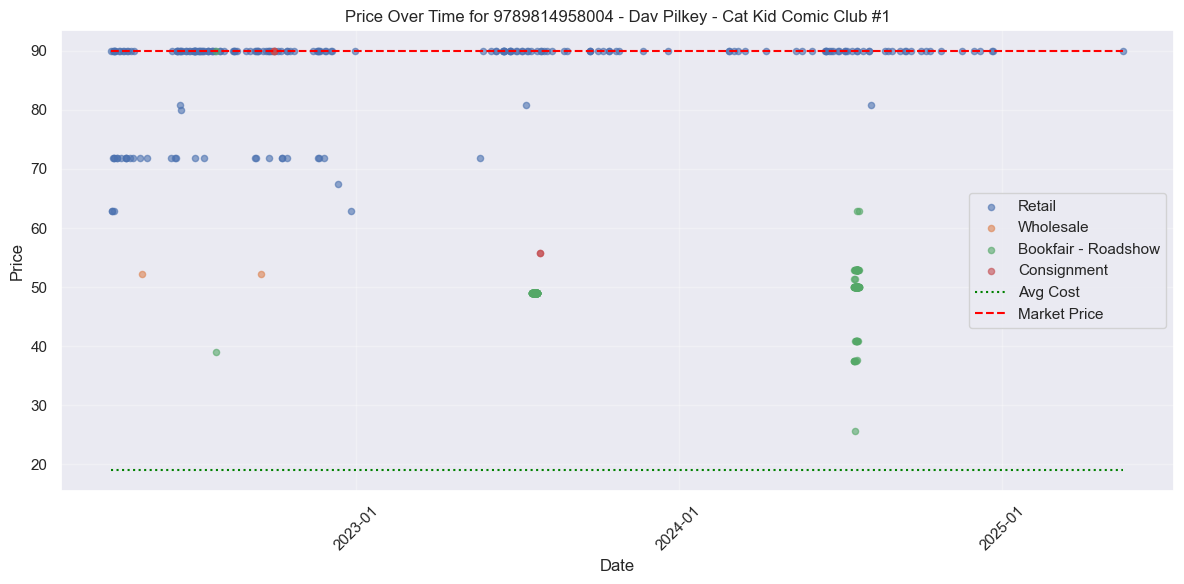

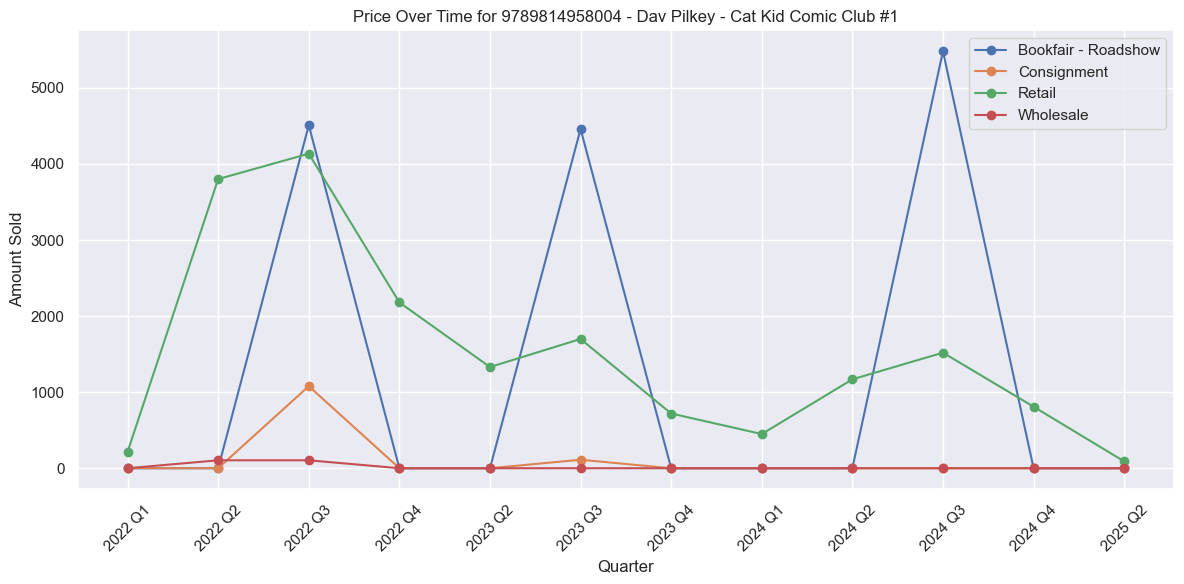

In [666]:
plot_price_over_time(merged_df, product='9789814958004')
plot_quarterly(merged_df, product='9789814958004')


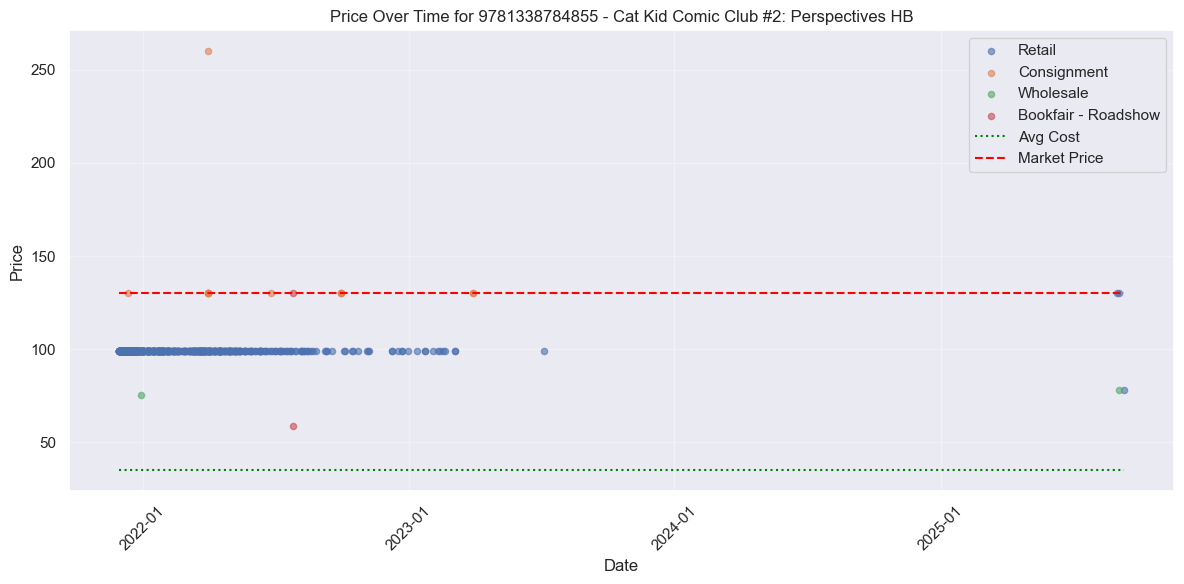

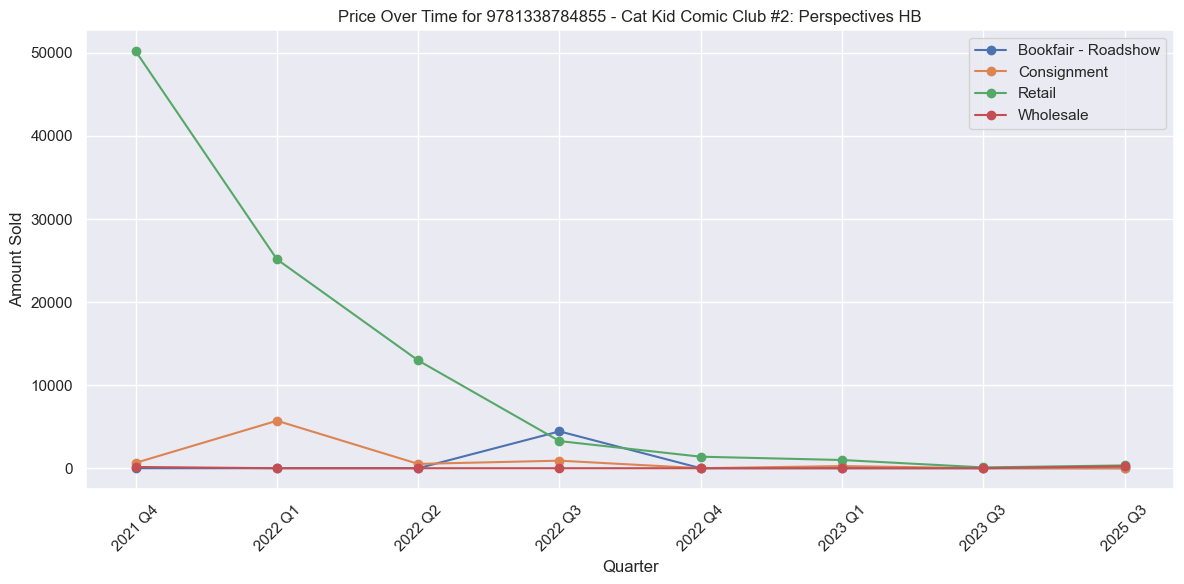

In [667]:
plot_price_over_time(merged_df, product='9781338784855')
plot_quarterly(merged_df, product='9781338784855')



In [668]:
top_products_preview = products_preview[products_preview['product'] == '9781338784855']
top_products_preview

,product,title,price,book_original_price,barcode,barcode2,isbn
1275,9781338784855,Cat Kid Comic Club #2: Perspectives HB,129.900000,129.90,1338784854,9781338784855,None


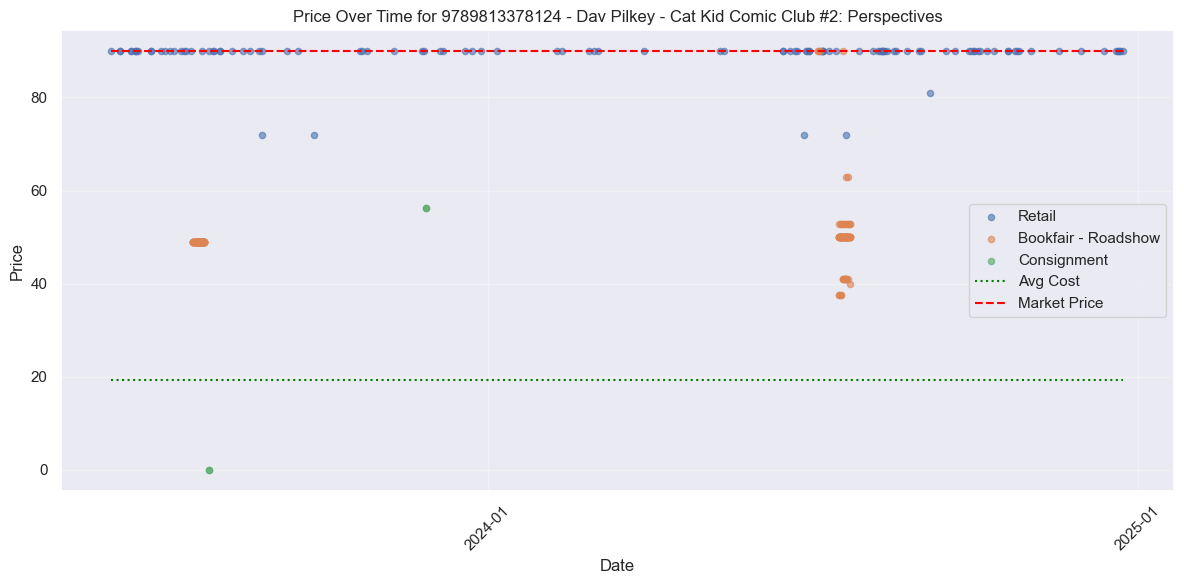

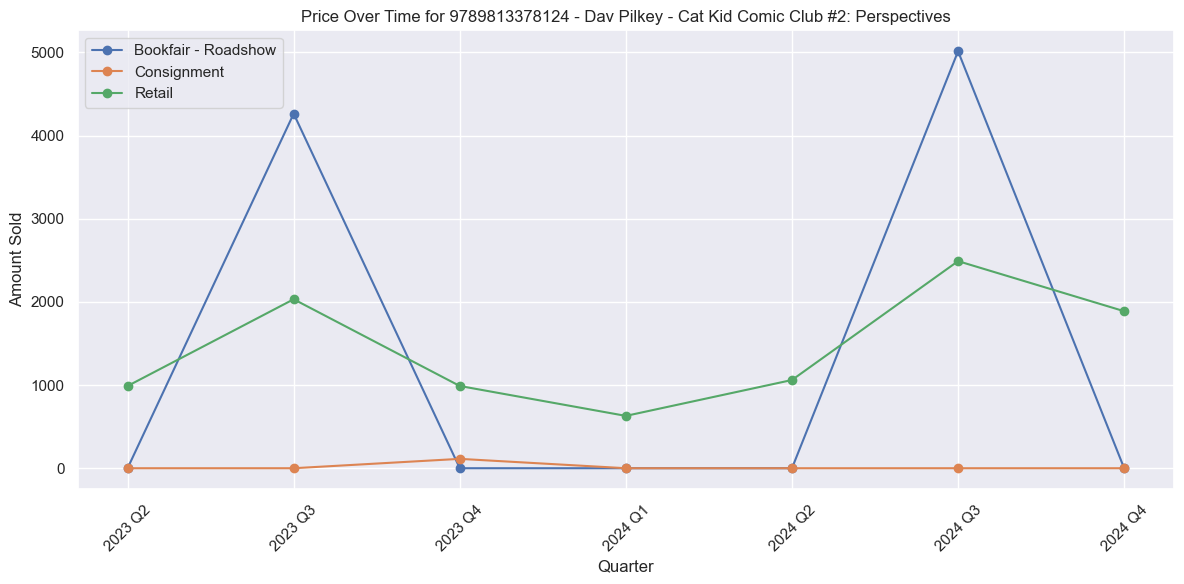

In [669]:
plot_price_over_time(merged_df, product='9789813378124')
plot_quarterly(merged_df, product='9789813378124')



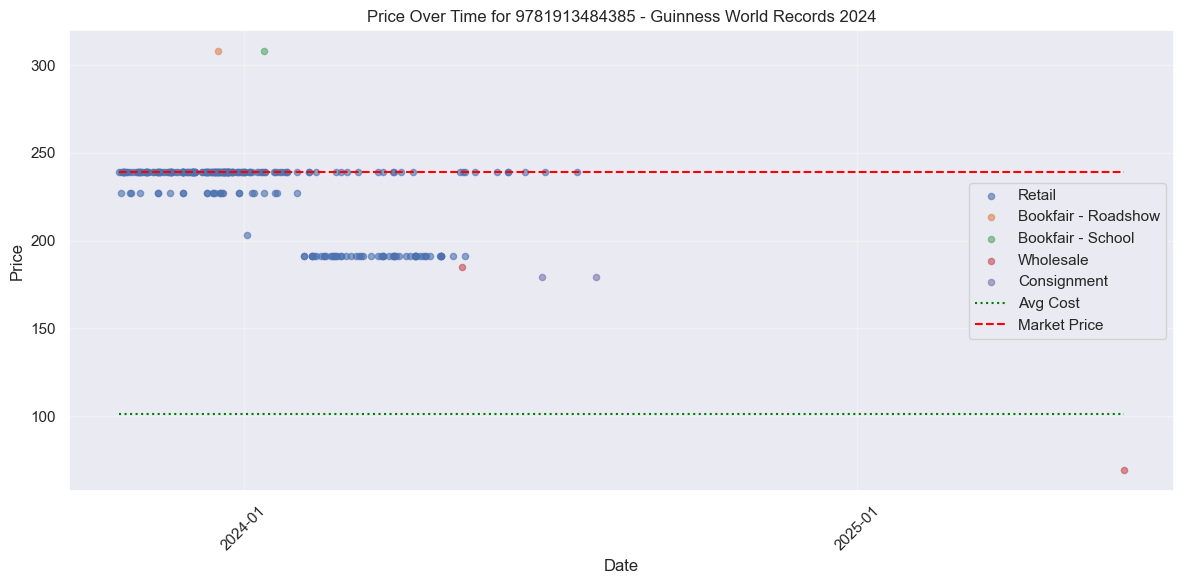

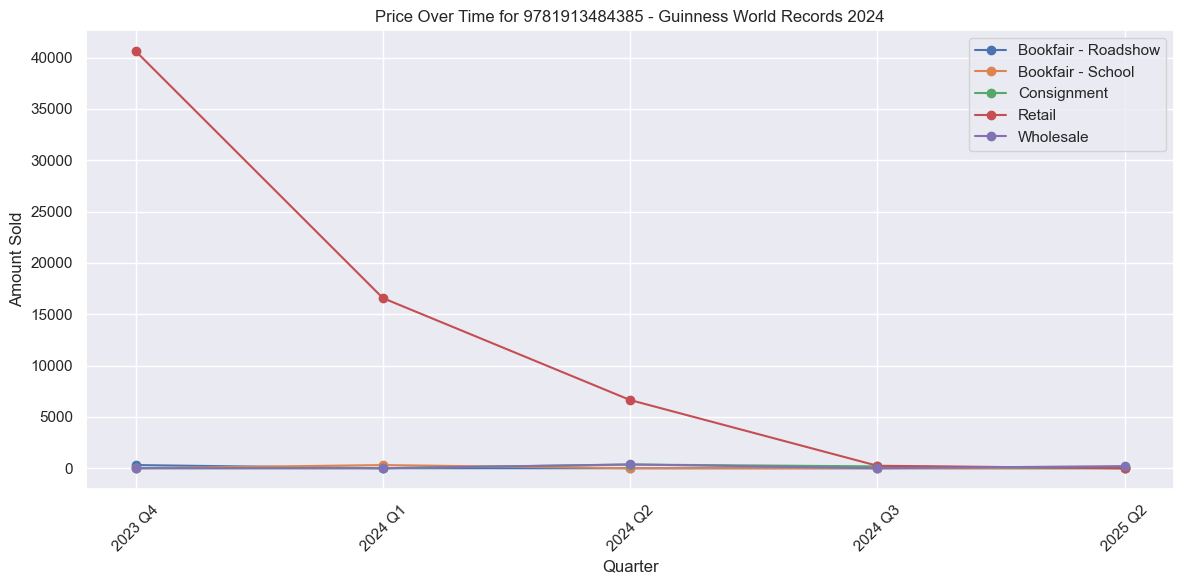

In [670]:
plot_price_over_time(merged_df, product='9781913484385')
plot_quarterly(merged_df, product='9781913484385')



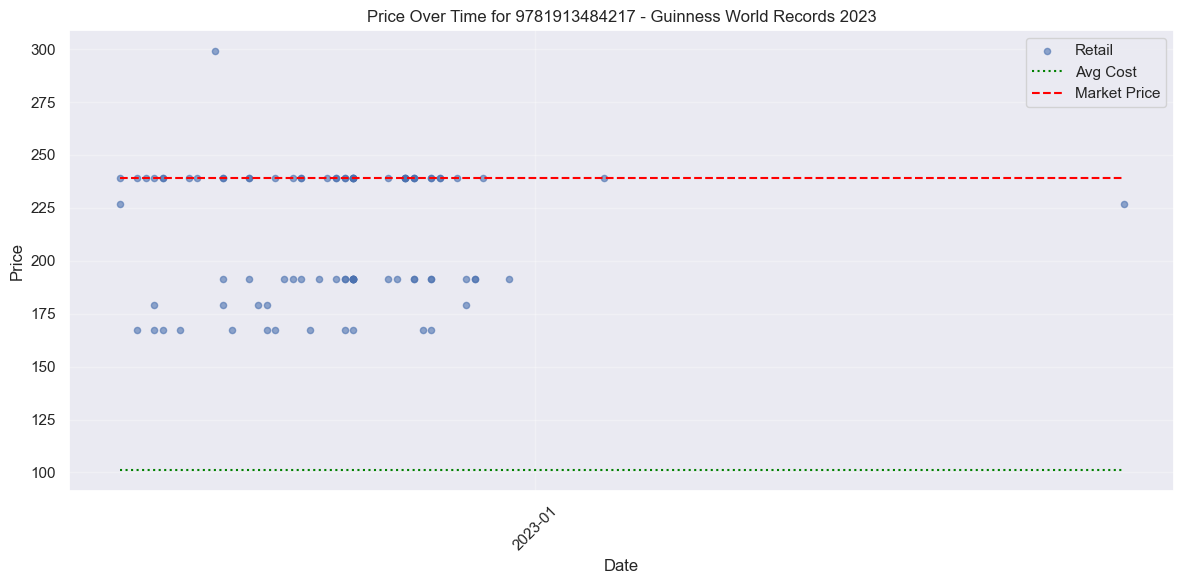

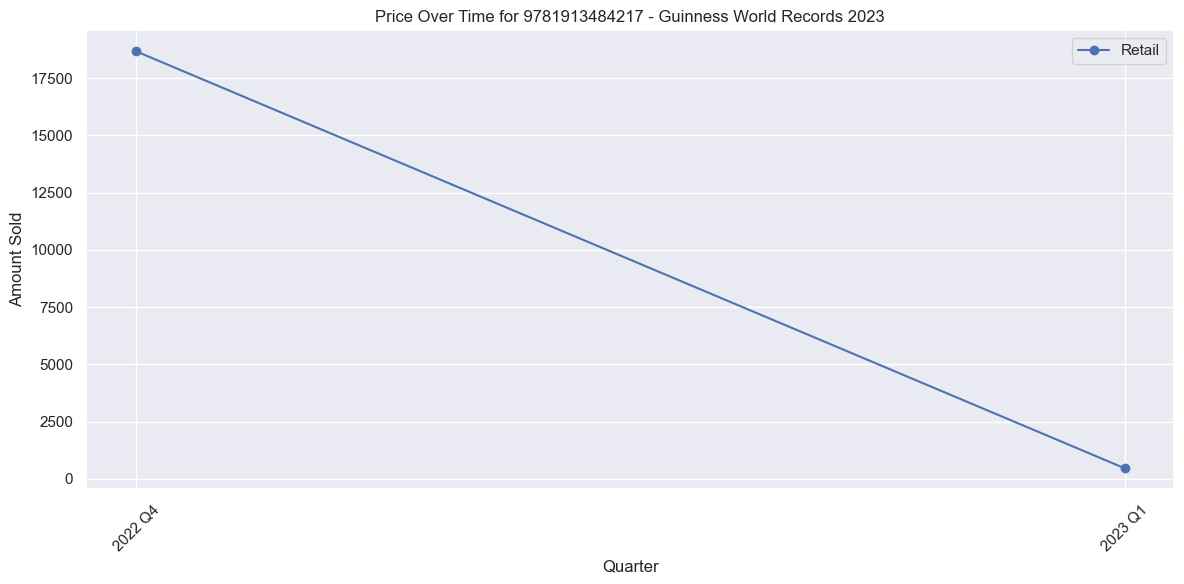

In [671]:
plot_price_over_time(merged_df, product='9781913484217')
plot_quarterly(merged_df, product='9781913484217')



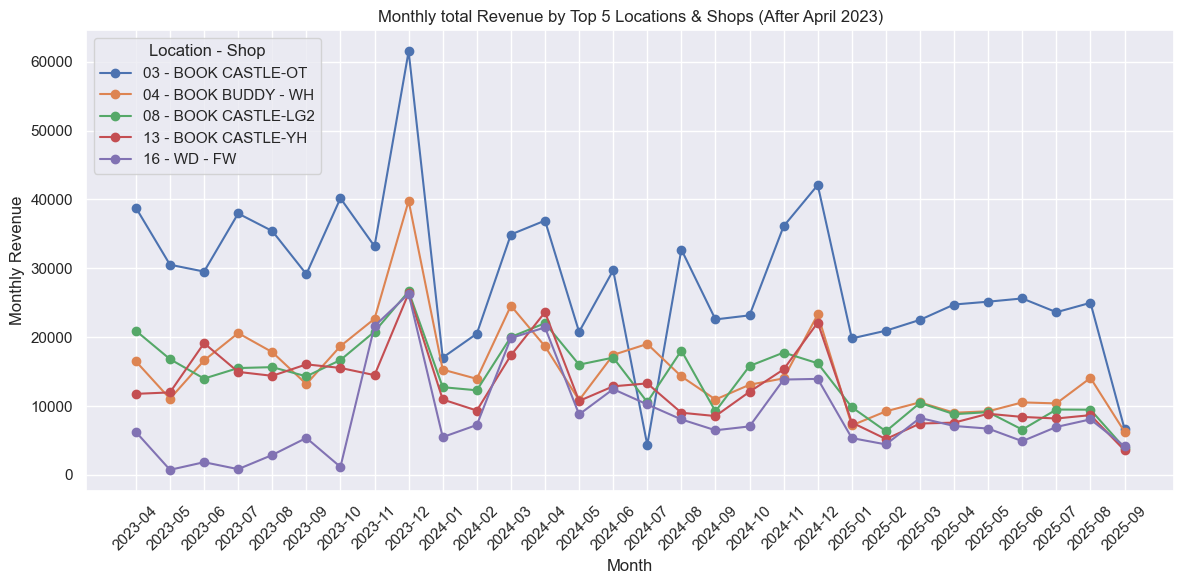

In [672]:
# Filter Retail channel
retail_df = merged_df[merged_df['channel'] == 'Retail'].copy()
retail_df['trandate'] = pd.to_datetime(retail_df['trandate'])

# Filter for dates after April 2023
filtered_df = retail_df[retail_df['trandate'] > '2023-04-01'].copy()
filtered_df['month'] = filtered_df['trandate'].dt.to_period('M')

# Group by month, location, and shopname, calculate monthly revenue
monthly_avg = (
    filtered_df.groupby(['month', 'location', 'shopname'])['amount']
    .sum()
    .reset_index()
)

# Get top 5 locations by total revenue
top_locations = monthly_avg.groupby('location')['amount'].sum().nlargest(5).index
filtered_top = monthly_avg[monthly_avg['location'].isin(top_locations)]

# ✅ Create a combined label for legend: "Location - Shopname"
filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']

# Pivot for plotting using combined label
pivot_df = filtered_top.pivot(index='month', columns='label', values='amount').sort_index()
pivot_df.index = pivot_df.index.astype(str)

# Plot line graph
plt.figure(figsize=(12, 6))
for label in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[label], marker='o', label=label)

plt.title('Monthly total Revenue by Top 5 Locations & Shops (After April 2023)')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.legend(title='Location - Shop', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

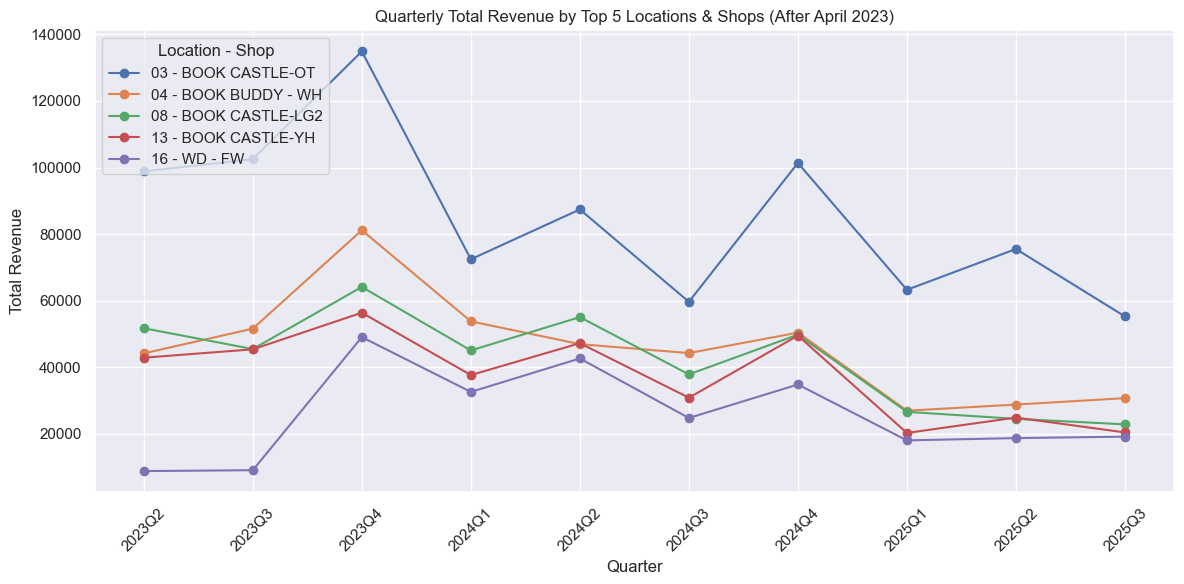

In [673]:
# Filter Retail channel
retail_df = merged_df[merged_df['channel'] == 'Retail'].copy()
retail_df['trandate'] = pd.to_datetime(retail_df['trandate'])

# Filter for dates after April 2023
filtered_df = retail_df[retail_df['trandate'] > '2023-04-01'].copy()
filtered_df['quarter'] = filtered_df['trandate'].dt.to_period('Q')  # ✅ Quarterly

# Group by quarter, location, and shopname, calculate total revenue
quarterly_sum = (
    filtered_df.groupby(['quarter', 'location', 'shopname'])['amount']
    .sum()
    .reset_index()
)

# Get top 5 locations by total revenue
top_locations = quarterly_sum.groupby('location')['amount'].sum().nlargest(5).index
filtered_top = quarterly_sum[quarterly_sum['location'].isin(top_locations)]

# ✅ Create combined label for legend: "Location - Shopname"
filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']

# Pivot for plotting using combined label
pivot_df = filtered_top.pivot(index='quarter', columns='label', values='amount').sort_index()
pivot_df.index = pivot_df.index.astype(str)

# Plot line graph
plt.figure(figsize=(12, 6))
for label in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[label], marker='o', label=label)

plt.title('Quarterly Total Revenue by Top 5 Locations & Shops (After April 2023)')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.legend(title='Location - Shop', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

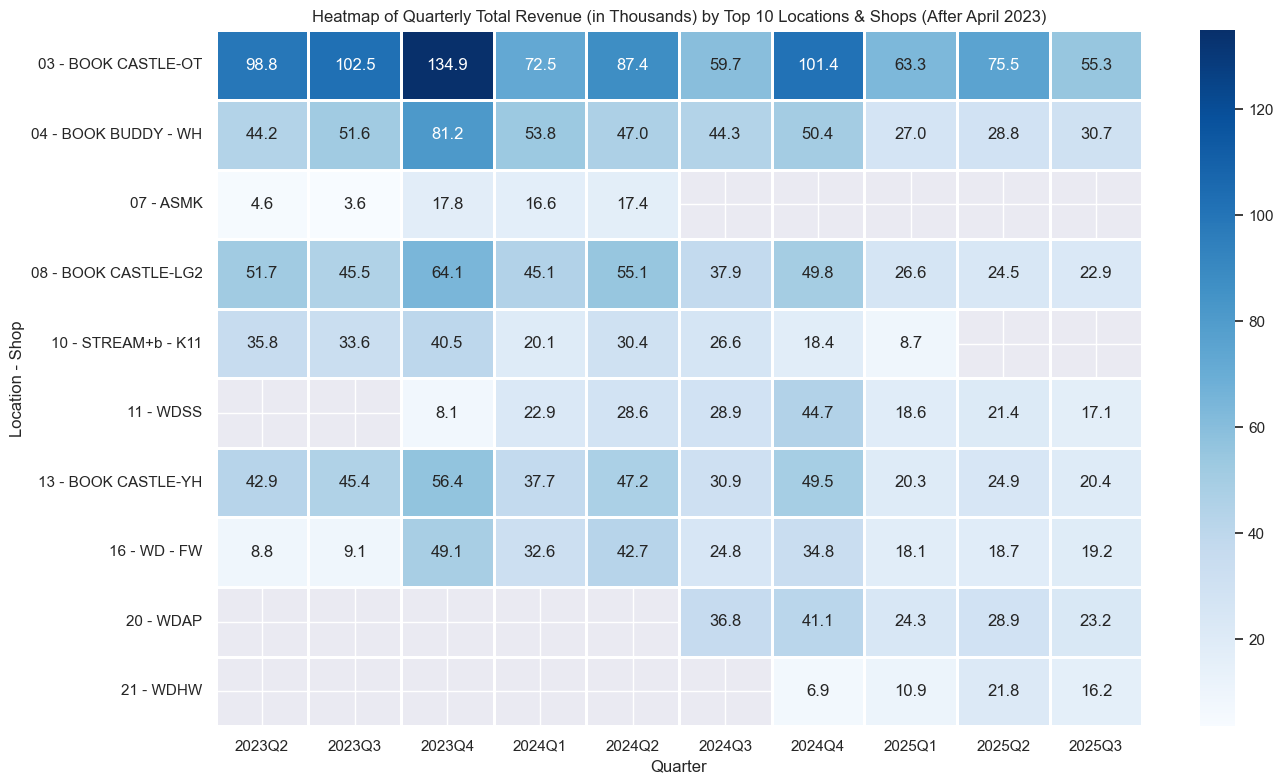

In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Retail channel
retail_df = merged_df[merged_df['channel'] == 'Retail'].copy()
retail_df['trandate'] = pd.to_datetime(retail_df['trandate'])

# Filter for dates after April 2023
filtered_df = retail_df[retail_df['trandate'] > '2023-04-01'].copy()
filtered_df['quarter'] = filtered_df['trandate'].dt.to_period('Q')  # Quarterly

# Group by quarter, location, and shopname, calculate total revenue
quarterly_sum = (
    filtered_df.groupby(['quarter', 'location', 'shopname'])['amount']
    .sum()
    .reset_index()
)

# Get top 10 locations by total revenue
top_locations = quarterly_sum.groupby('location')['amount'].sum().nlargest(10).index
filtered_top = quarterly_sum[quarterly_sum['location'].isin(top_locations)]

# Combine location and shopname for clarity
filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']

# Pivot for heatmap
pivot_df = filtered_top.pivot(index='label', columns='quarter', values='amount').sort_index()
pivot_df.columns = pivot_df.columns.astype(str)

# Convert revenue to thousands
pivot_df = pivot_df / 1000

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="Blues", linewidths=1)
plt.title('Heatmap of Quarterly Total Revenue (in Thousands) by Top 10 Locations & Shops (After April 2023)')
plt.xlabel('Quarter')
plt.ylabel('Location - Shop')
plt.tight_layout()
plt.show()

In [675]:
import pandas as pd

daily_df=retail_df.groupby(['trandate'])['amount'].sum().reset_index()


# Load holiday data
holidays_df = pd.read_csv("hong_kong_public_holidays_2014_2025_full.csv")
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])


# Merge retail data with holiday info
daily_df = daily_df.merge(holidays_df, left_on='trandate', right_on='Date', how='left')

# Create holiday flag
daily_df['is_holiday'] = daily_df['Holiday'].notna()

# Sort by date for rolling calculation
daily_df = daily_df.sort_values('trandate')

# -----------------------------
# 2. Compute non-holiday mean (baseline)
# -----------------------------
non_holiday_mean = daily_df[daily_df['Holiday'].isna()]['amount'].mean()

# Compute uplift vs non-holiday mean
daily_df['uplift_vs_mean'] = daily_df.apply(
    lambda row: ((row['amount'] - non_holiday_mean) / non_holiday_mean * 100) if row['is_holiday'] else 0,
    axis=1
)


daily_df['rolling_30d_sales'] = daily_df['amount'].rolling(window=30, min_periods=1).mean()

# Compute uplift vs rolling average
daily_df['uplift_vs_rolling'] = daily_df.apply(
    lambda row: ((row['amount'] - row['rolling_30d_sales']) / row['rolling_30d_sales'] * 100) if row['is_holiday'] else 0,
    axis=1
)

# -----------------------------
# 4. Aggregate by holiday name for both metrics
# -----------------------------
holiday_impact = (
    daily_df.dropna(subset=['Holiday'])
    .groupby('Holiday')[['uplift_vs_mean', 'uplift_vs_rolling']]
    .mean()
    .reset_index()
    .sort_values('uplift_vs_mean', ascending=False)
)

# -----------------------------
# 5. Visualization: Grouped bar chart
# -----------------------------
holiday_melted = holiday_impact.melt(id_vars='Holiday', value_vars=['uplift_vs_mean', 'uplift_vs_rolling'],
                                     var_name='Metric', value_name='Average Uplift (%)')

fig = px.bar(holiday_melted, x='Holiday', y='Average Uplift (%)', color='Metric', barmode='group',
             title='Holiday Impact Comparison: Non-Holiday Mean vs 30days Rolling',
             labels={'holiday_name': 'Holiday', 'Average Uplift (%)': 'Avg Uplift (%)'},
             text='Average Uplift (%)')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.show()


📚✨ Back-to-School Mega Sale is here!
A new school year means new stories, new adventures, and the perfect time to refresh your home library. This September, we’re bringing you exclusive in-store savings to make it easier than ever to stock up on books your kids will love.
✅ Spend HK$300 → 20% OFF
✅ Spend HK$600 → 25% OFF
✅ Spend HK$2,000 → 40% OFF 🎉
Whether it’s bedtime favourites, activity books to spark curiosity, or learning resources to support schoolwork, you’ll find treasures for every age and stage.
📍 Available in selected offline stores (excl. Kai Tak & Airport shops)
⏰ Promotion runs until 9 Sep

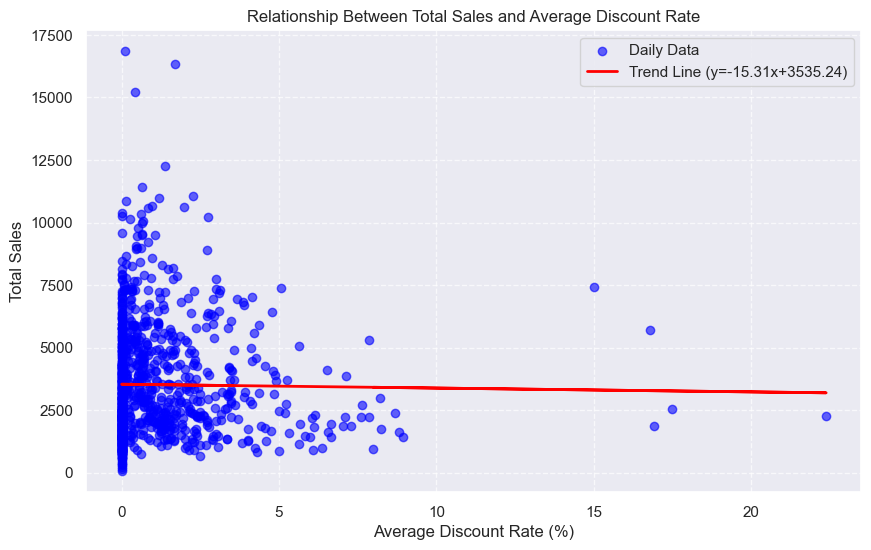

In [684]:
# Analyze relationship between total sales and average discount rate
daily_discount_df_b = retail_df[retail_df['discount'] < 100]

# Aggregate daily total revenue and average discount rate
daily_discount_df = (
    daily_discount_df_b.groupby('trandate')
    .agg(
        total_revenue=('amount', 'sum'),
        avg_discount_rate=('discount', 'mean')
    )
    .reset_index()
)

# Filter for dates from 2023-01-01 onwards
daily_discount_df = daily_discount_df[daily_discount_df['trandate'] >= '2023-01-01']

# Assuming daily_df has columns: total_revenue, avg_discount_rate
x = daily_discount_df['avg_discount_rate']
y = daily_discount_df['total_revenue']

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x, y, alpha=0.6, color='blue', label='Daily Data')

# Calculate and plot trend line
m, b = np.polyfit(x, y, 1)  # Linear regression
plt.plot(x, m*x + b, color='red', linewidth=2, label=f'Trend Line (y={m:.2f}x+{b:.2f})')

# Labels and title
plt.title('Relationship Between Total Sales and Average Discount Rate after 2023-01-01')
plt.xlabel('Average Discount Rate (%)')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()


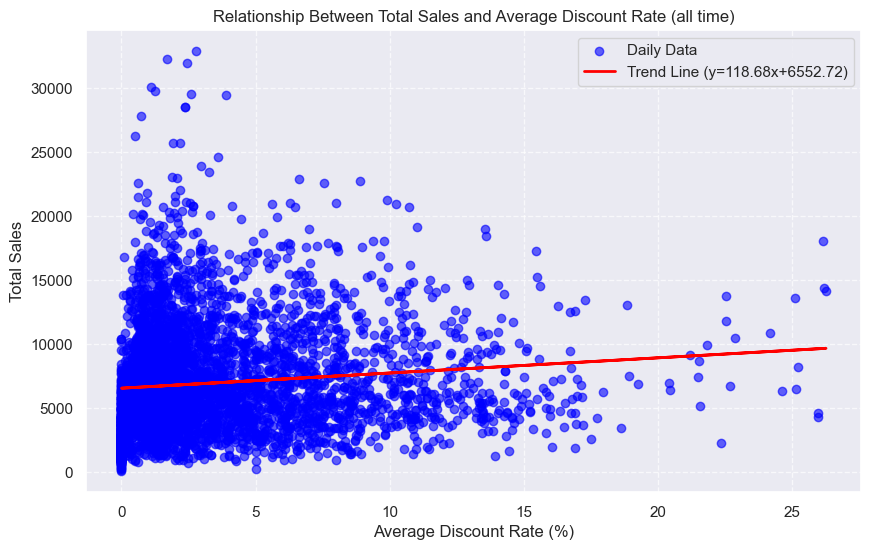

In [685]:
# Analyze relationship between total sales and average discount rate
daily_discount_df_b = retail_df[retail_df['discount'] < 100]

# Aggregate daily total revenue and average discount rate
daily_discount_df = (
    daily_discount_df_b.groupby('trandate')
    .agg(
        total_revenue=('amount', 'sum'),
        avg_discount_rate=('discount', 'mean')
    )
    .reset_index()
)

# Filter for dates from 2023-01-01 onwards
#daily_discount_df = daily_discount_df[daily_discount_df['trandate'] >= '2023-01-01']

# Assuming daily_df has columns: total_revenue, avg_discount_rate
x = daily_discount_df['avg_discount_rate']
y = daily_discount_df['total_revenue']

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x, y, alpha=0.6, color='blue', label='Daily Data')

# Calculate and plot trend line
m, b = np.polyfit(x, y, 1)  # Linear regression
plt.plot(x, m*x + b, color='red', linewidth=2, label=f'Trend Line (y={m:.2f}x+{b:.2f})')

# Labels and title
plt.title('Relationship Between Total Sales and Average Discount Rate (all time)')
plt.xlabel('Average Discount Rate (%)')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()
